## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.  

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Importing and Understanding the data

In [1]:
# Importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset

df = pd.read_csv("Leads.csv")

In [4]:
#checking the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking the shape of dataset
df.shape

(9240, 37)

In [6]:
#checking statistical aspect of dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#checking type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- There are some missing values in the dataset

## Step 2:Data Cleaning

In [8]:
# checking the null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#percentage of null values
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Treatment for select values

As it is mentioned in the problem statement many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

In [10]:
#replacing select values to nan values
df = df.replace('Select',np.nan)

In [11]:
#percentage of null values
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [12]:
#dropping columns which has null values >39% 
df = df.drop(columns=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score',                       
                    'Asymmetrique Activity Score','Asymmetrique Activity Index','Asymmetrique Profile Index' ,'City'], axis=1)

In [13]:
# #checking some columns who has 20-40% null values
df.Specialization.value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

- In Specialization, null values which are present may be students or others as they are filling the option but did not find any, so they left as it is.So, we can replace the null values with 'Others' level

In [14]:
df.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [15]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- There is mostly only 1 level in this column, not giving any useful information.So we can drop it

In [16]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- Mostly customers are Unemployed.So, we can impute the missing values with umemployed.

In [17]:
df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

- Mostly customers are from India ,better to drop this column also.As this would not help in gaining better insights

In [18]:
#dropping column which are of not use
df = df.drop(columns=['Country','What matters most to you in choosing a course'], axis=1)

In [19]:
#Imputing the current occupation with umemployed
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace=True)



In [20]:
#Replacing nan values ofSpecialization with 'Others'
df['Specialization'] = df['Specialization'].replace(np.nan,'Others')

#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

In [21]:
#rechecking the null values again
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Search                                      0.00
Newspaper Article                           0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization      

In [22]:
# Dropping the rows value for the remaining columns having <2% null values
df.dropna(inplace=True)

In [23]:
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

 - Now we don't have any null values in the dataset

In [24]:
#checking no of unique values in dataframe
df.nunique()

Prospect ID                                 9074
Lead Number                                 9074
Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

- We will drop prospect ID and lead number as they are unique for every customer and will not help in any insights.  
- Also dropping the columns which have only one value, as they are not helping in any scenario as per business insights    

In [25]:
df = df.drop(columns=['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses',
                      'Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [26]:
#rechecking the shape
df.shape

(9074, 20)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [28]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()

In [29]:
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [30]:
for i in cat_col:
    perc = round(df[i].value_counts(normalize=True)*100,2)
    print("value_counts % for :",i,"\n")
    print(perc,"\n")
    print("-"*40)

value_counts % for : Lead Origin 

Landing Page Submission    53.84
API                        39.43
Lead Add Form               6.40
Lead Import                 0.33
Name: Lead Origin, dtype: float64 

----------------------------------------
value_counts % for : Lead Source 

Google               31.61
Direct Traffic       28.03
Olark Chat           19.32
Organic Search       12.72
Reference             4.88
Welingak Website      1.42
Referral Sites        1.38
Facebook              0.34
bing                  0.07
google                0.06
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64 

----------------------------------------
value_counts % for : Do Not Email 

No     92.11
Yes     7.89
Name: Do Not Em

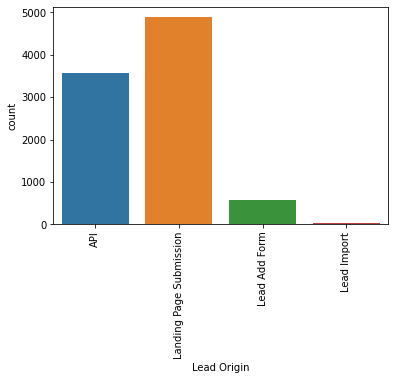

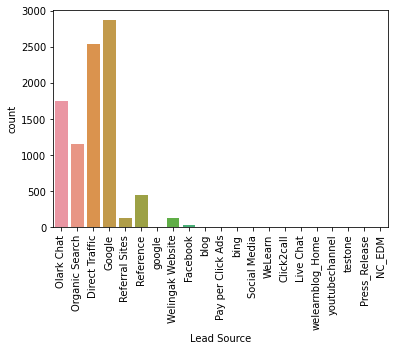

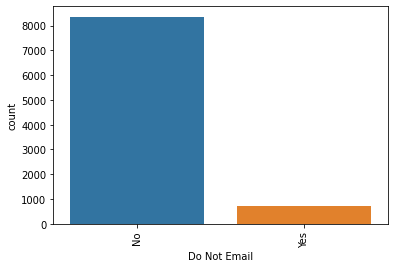

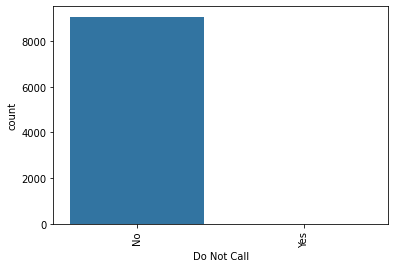

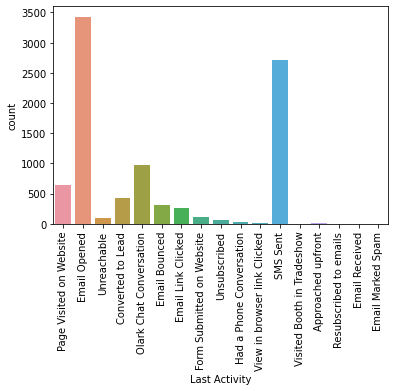

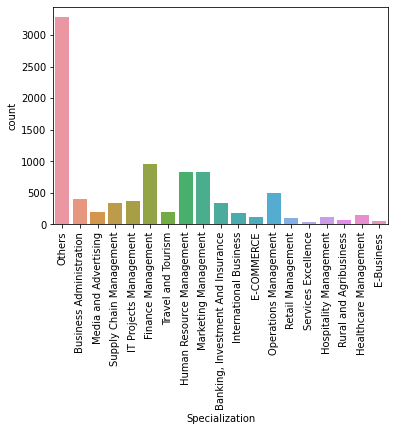

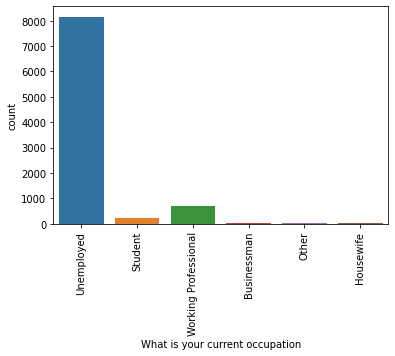

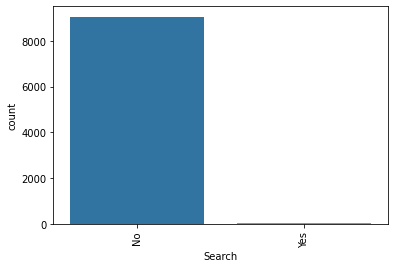

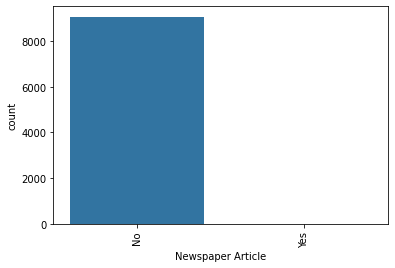

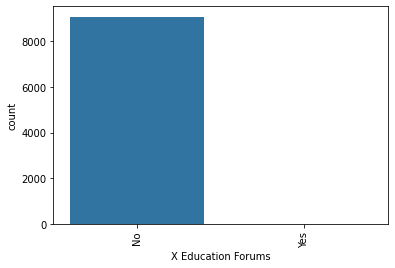

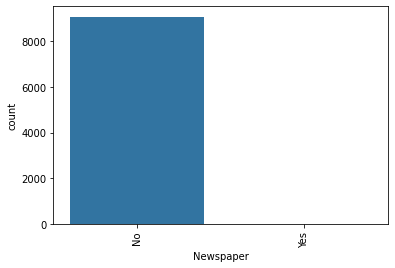

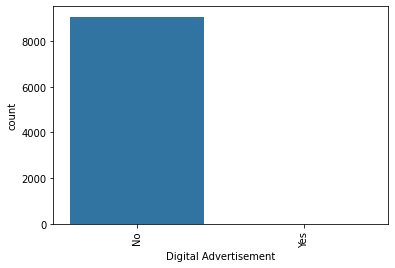

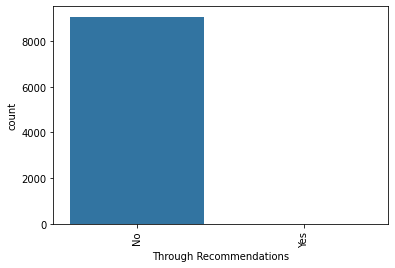

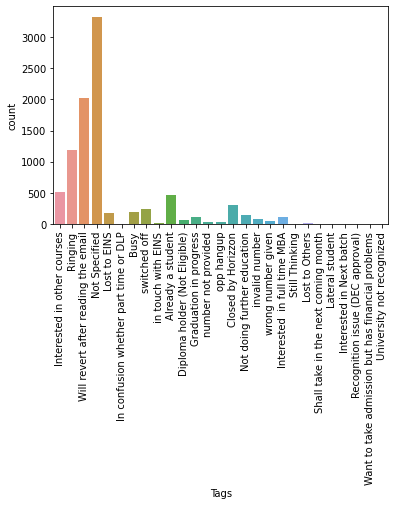

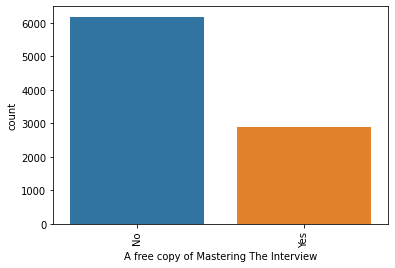

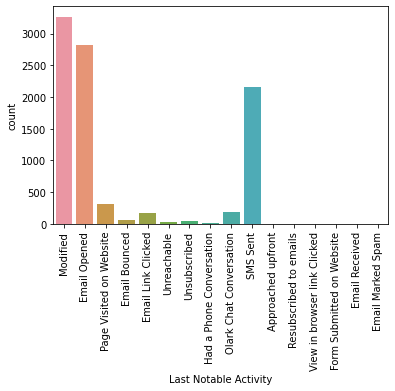

In [31]:
for i in cat_col:
    sns.countplot(x=i, data=df)
    plt.xticks(rotation=90)
    plt.show()
    

- Some columns are highly skewed.We are going to remove the columns whose percentage is >90% , we have also seen in the graph

In [32]:
df = df.drop(columns=['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                         'Through Recommendations','Do Not Email'],axis=1)

In [33]:
#rechecking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

## EDA

### Univariate Analysis

In [34]:
#Seperating categorical and numerical variables from dataframe
cat_var = df.select_dtypes(include='object').columns.tolist()
num_var = df.select_dtypes(include=['int64','float64']).columns.tolist()

### Categorical Attributes analysis

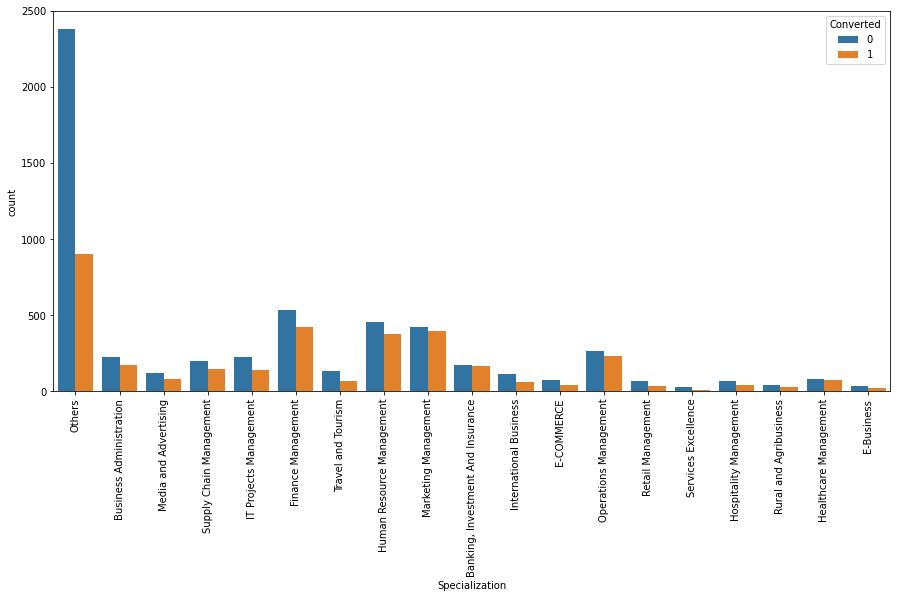

In [35]:
# plotting of Specialization column

plt.figure(figsize=[15,7])
sns.countplot(x=df.Specialization, hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

- Clubbing all Management levels into one because they show quite similar trends

In [36]:
df['Specialization'] = df['Specialization'].replace(['Finance Management', 'Human Resource Management',
       'Marketing Management', 'Operations Management',
       'IT Projects Management','Retail Management',
       'Supply Chain Management','Healthcare Management','Hospitality Management'], 'Management_Specializations')

In [37]:
# Visualizing count of converted leads

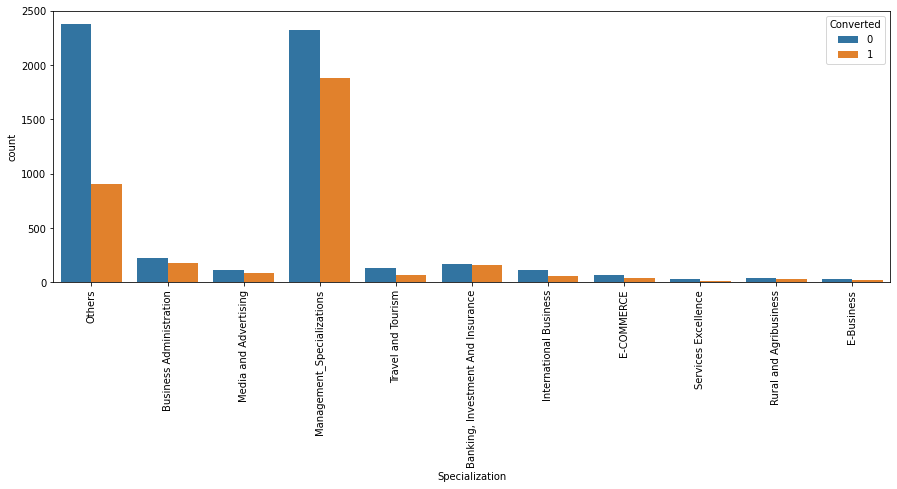

In [38]:
plt.figure(figsize=[15,5])
sns.countplot(x=df.Specialization, hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference:

- Those who have a Management specialization have a high chance of conversion 
- business administration and & BFSI sector also have a high chance of conversion

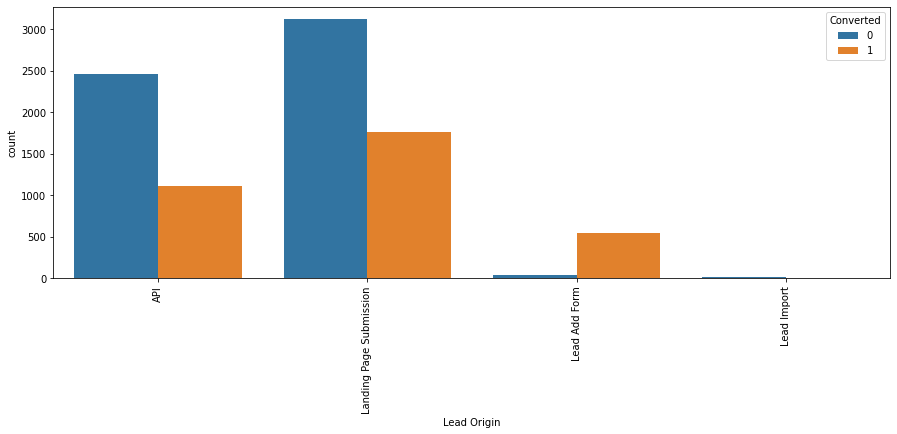

In [39]:
plt.figure(figsize=[15,5])
sns.countplot(x=df['Lead Origin'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference:

- API and Landing Page Submission brings higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.

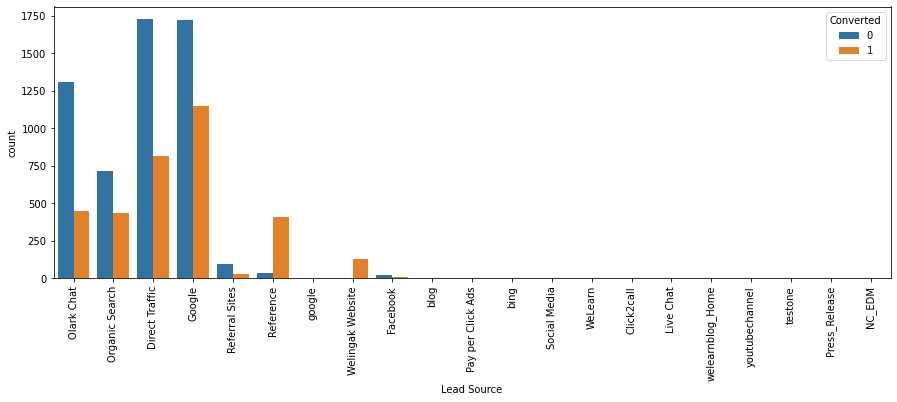

In [40]:
plt.figure(figsize=[15,5])
sns.countplot(x=df['Lead Source'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [41]:
#Combining low frequency values

df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')


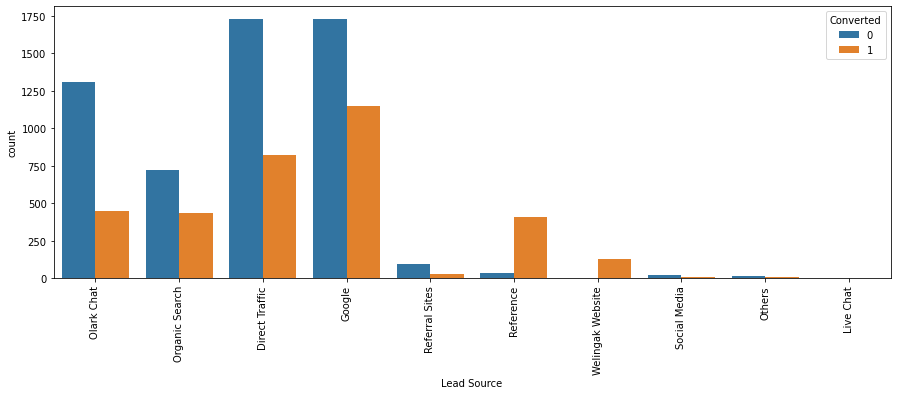

In [42]:
# visualization after combining values
plt.figure(figsize=[15,5])
sns.countplot(x=df['Lead Source'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference:

- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- We should focus to improve leads conversion on Olark chat, organic search, direct traffic and google because their count of leads are quite high

In [43]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [44]:
# Clubbing low frequency values to others
df['Last Activity'] = df['Last Activity'].replace(['Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'View in browser link Clicked', 'Approached upfront', 'Email Received',
       'Email Marked Spam', 'Visited Booth in Tradeshow',
       'Resubscribed to emails'], 'Others')

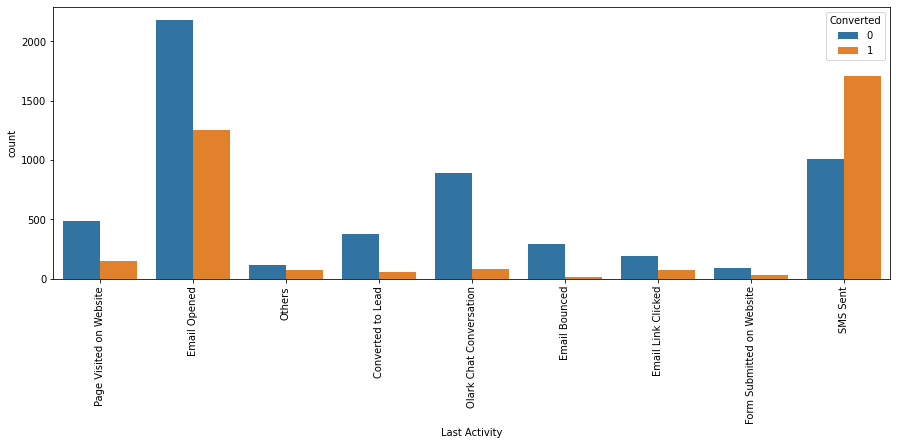

In [45]:
# visualization after combining values
plt.figure(figsize=[15,5])
sns.countplot(x=df['Last Activity'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference:

- SMS Sent activity has a very high conversion rate
- Focus should be on Email openend & those who are visiting website pages conversion rates

In [46]:
#checking count of values
df['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

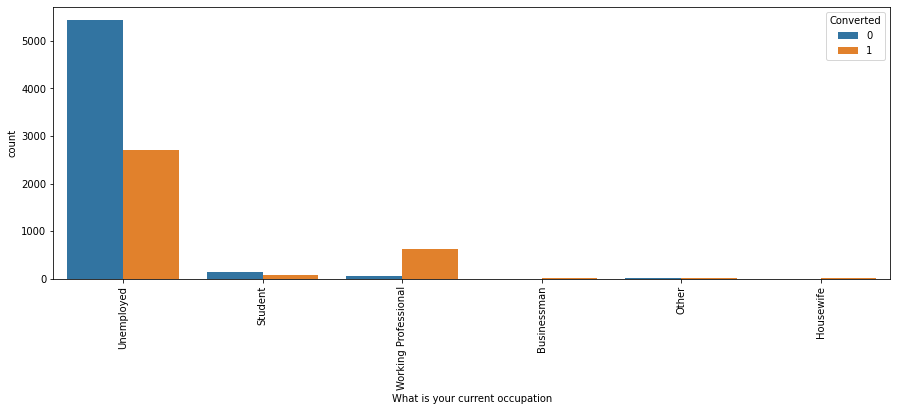

In [47]:
# visualizing values
plt.figure(figsize=[15,5])
sns.countplot(x=df['What is your current occupation'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference:

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.


In [48]:
#checking count of values
df.Tags.value_counts()

Not Specified                                        3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [49]:
#Clubbing low frequency values into others
df['Tags'] = df['Tags'].replace(['invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'Want to take admission but has financial problems',
       'In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'Shall take in the next coming month',
       'University not recognized', 'Recognition issue (DEC approval)','switched off','Graduation in progress'
                                ,'Interested  in full time MBA'], 'Other Tags')

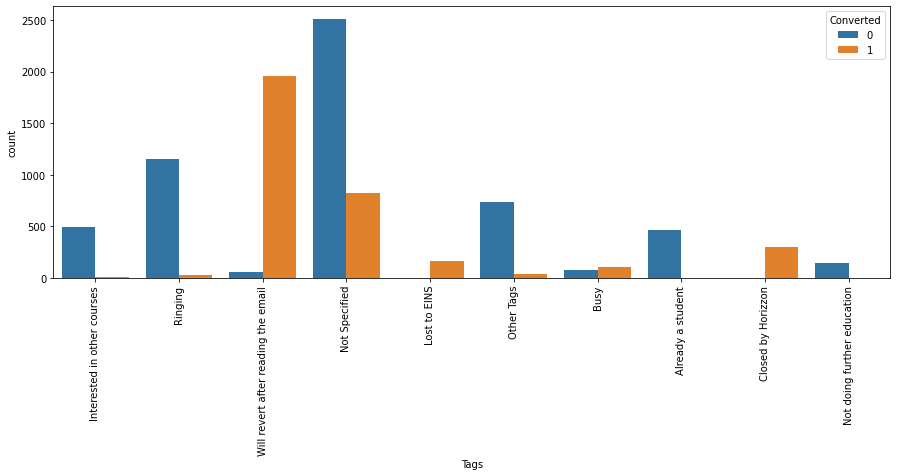

In [50]:
# visualizing after clubbing values
plt.figure(figsize=[15,5])
sns.countplot(x=df['Tags'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [51]:
#checking count of values
df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

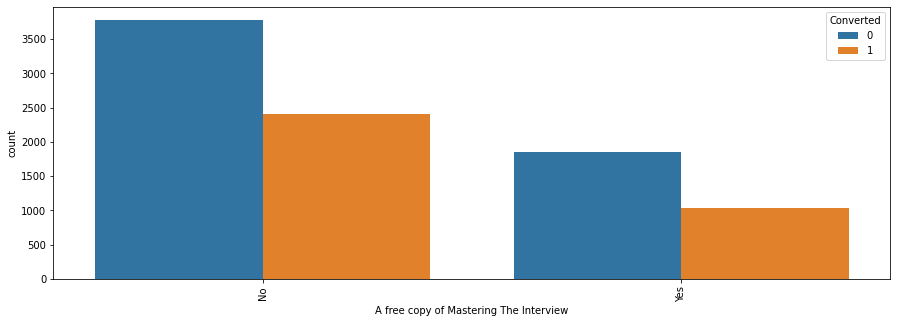

In [52]:
# visualizing values
plt.figure(figsize=[15,5])
sns.countplot(x=df['A free copy of Mastering The Interview'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [53]:
#checking count of values
df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [54]:
# Clubbing low frequency values
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received'], 'Other_notable_activity')

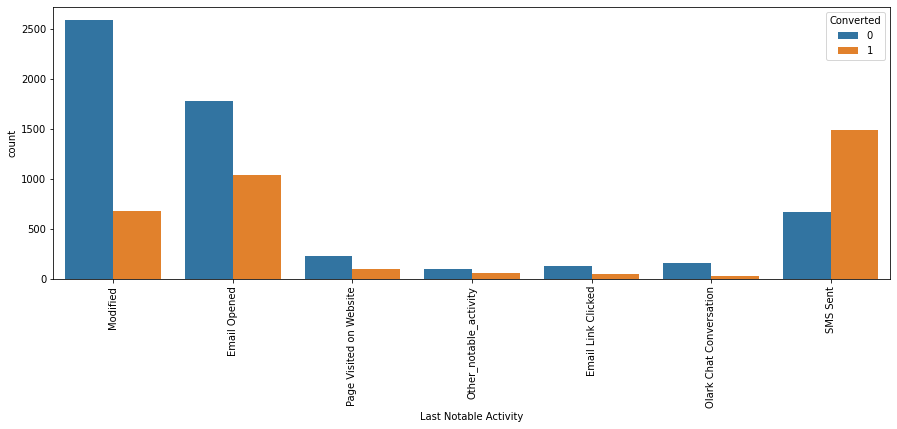

In [55]:
# visualizing after combining values
plt.figure(figsize=[15,5])
sns.countplot(x=df['Last Notable Activity'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference:
- SMS Spent activity has a pretty high conversion rate
- To increase conversion rates, focus should be on Modified & email openend levels

### Numerical Attributes analysis

In [56]:
#checking the percentage of data that gets converted
df['Converted'].sum()/len(df['Converted'].index)*100

37.85541106458012

- 38% of leads got converted, pretty much balanced data

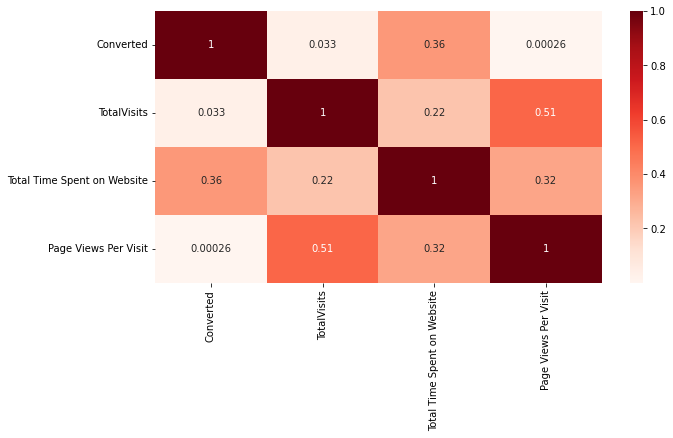

In [57]:
#Checking correlations of numeric values
plt.figure(figsize=(10,5))

# heatmap
sns.heatmap(df.corr(), cmap="Reds", annot=True)
plt.show()

#### Inference:

- Quite a good linear relationship b/w Total visits & Total time spent on website

#### Checking Outliers

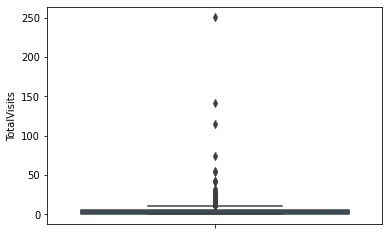

In [58]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

- Some outliers present in "Total Visits" 

In [59]:
#checking percentiles values for the total visit
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

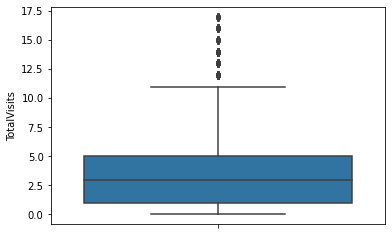

In [60]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

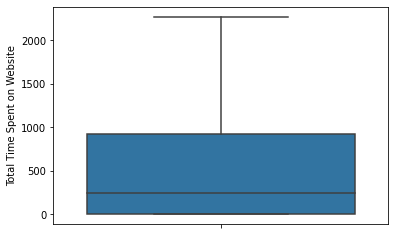

In [61]:
#visualizing spread of Total Time Spent on Website

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

- There are no outliers present in this attribute

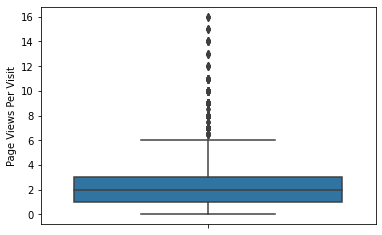

In [62]:
#visualizing spread of Page Views Per Visit

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [63]:
#checking percentile distribution
df['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

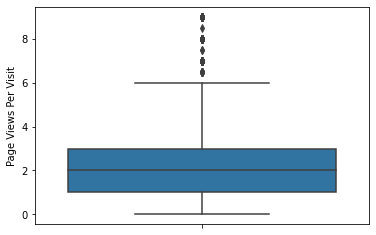

In [64]:
# Remove top & bottom 1% outliers
Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit'] <= Q3)]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[(df['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [65]:
#Rechecking shape
df.shape


(8924, 12)

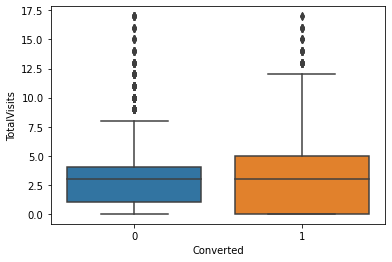

In [66]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()


 - Median for converted & non-converted are close

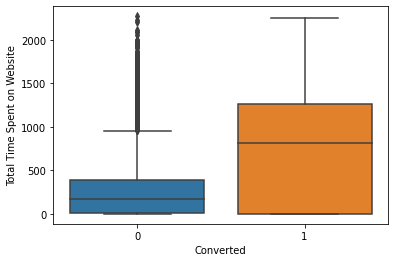

In [67]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

#### Inference:

- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

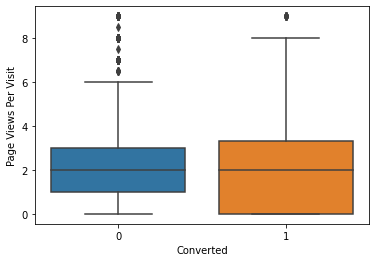

In [68]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

 - Median for converted & non-converted are same

### Bivariate Analysis

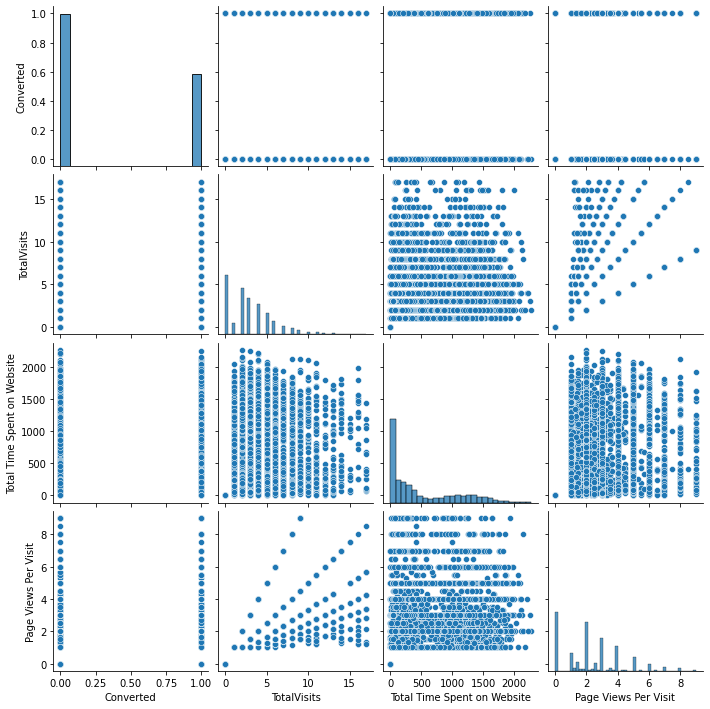

In [69]:
sns.pairplot(df)
plt.show()

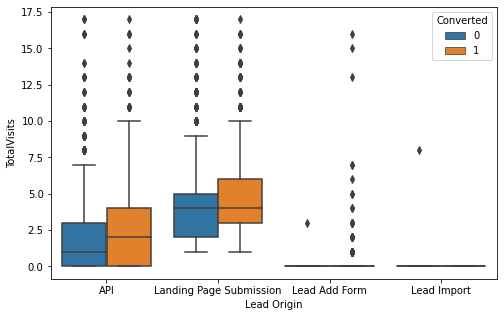

In [70]:
plt.figure(figsize=[8,5])
sns.boxplot(x='Lead Origin',y='TotalVisits',hue='Converted' ,data=df)
plt.show()

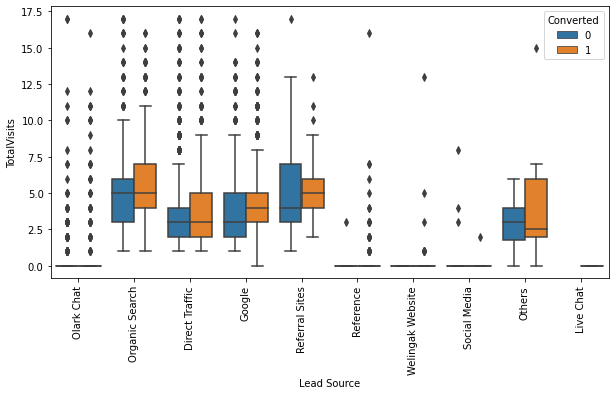

In [71]:
plt.figure(figsize=[10,5])
sns.boxplot(x='Lead Source',y='TotalVisits',hue='Converted' ,data=df)
plt.xticks(rotation=90)
plt.show()

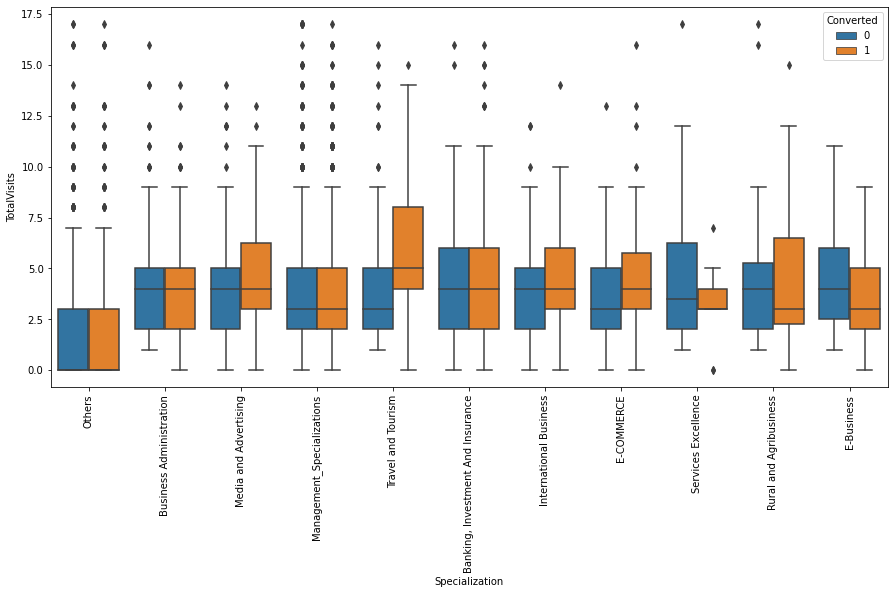

In [72]:
plt.figure(figsize=[15,7])
sns.boxplot(x='Specialization',y='TotalVisits',hue='Converted' ,data=df)
plt.xticks(rotation=90)
plt.show()

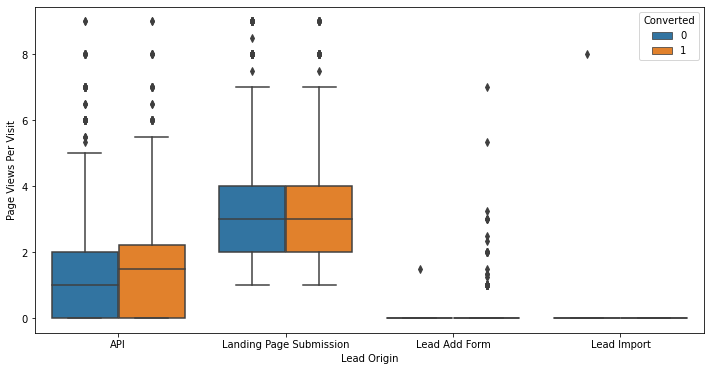

In [73]:
plt.figure(figsize=[12,6])
sns.boxplot(x='Lead Origin',y='Page Views Per Visit',hue='Converted' ,data=df)
plt.show()

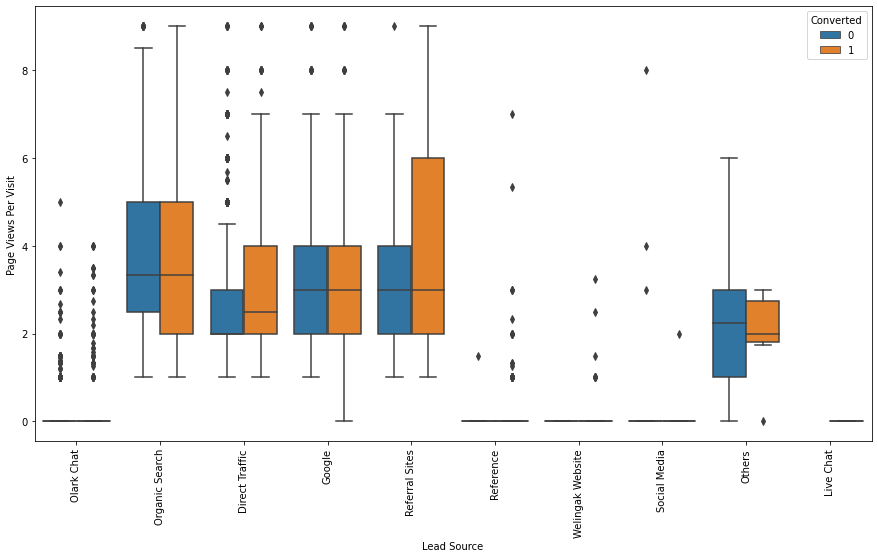

In [74]:
plt.figure(figsize=[15,8])
sns.boxplot(x='Lead Source',y='Page Views Per Visit',hue='Converted' ,data=df)
plt.xticks(rotation=90)
plt.show()

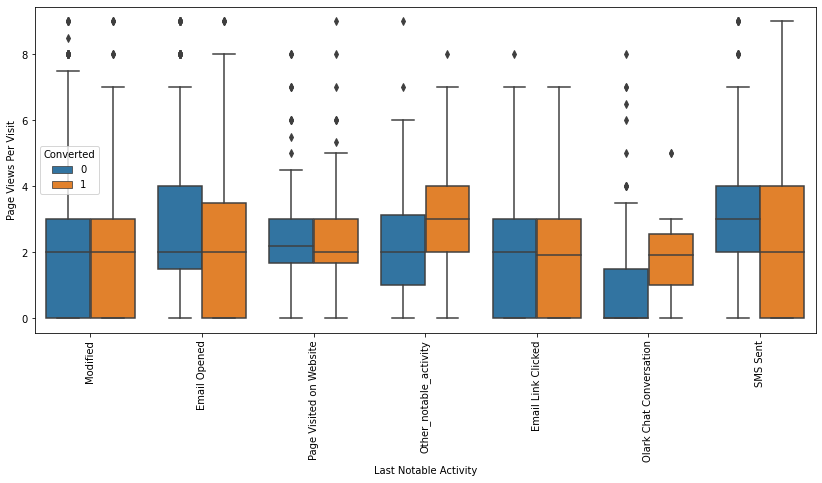

In [75]:
plt.figure(figsize=[14,6])
sns.boxplot(x='Last Notable Activity',y='Page Views Per Visit',hue='Converted' ,data=df)
plt.xticks(rotation=90)
plt.show()

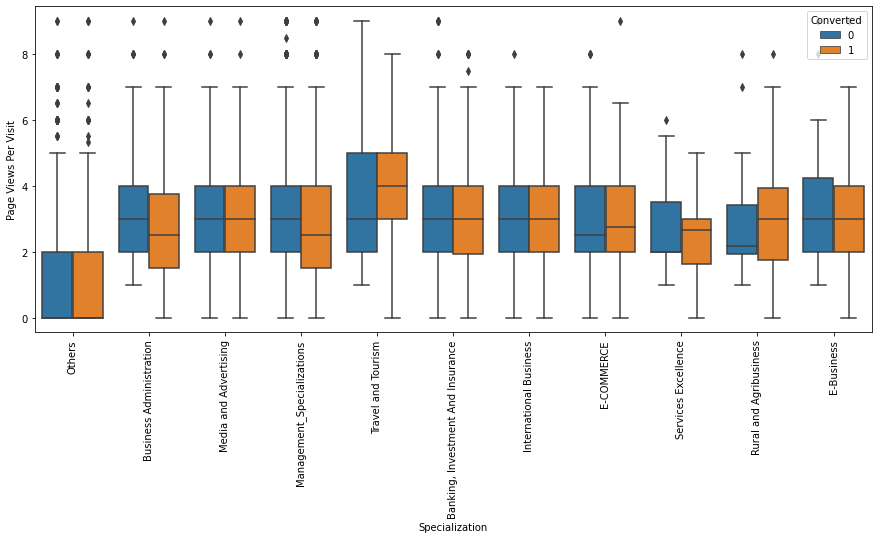

In [76]:
plt.figure(figsize=[15,6])
sns.boxplot(x='Specialization',y='Page Views Per Visit',hue='Converted' ,data=df)
plt.xticks(rotation=90)
plt.show()

#### Inferences:

- All graphs look good, there are not as such outliers.
- All outliers are within a range, so we will not remove any, as these can be handy for further analysis    

## Step 3 - Data Preparation

#### Converting some binary variables (Yes/No) to (1/0)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8924 non-null   object 
 1   Lead Source                             8924 non-null   object 
 2   Converted                               8924 non-null   int64  
 3   TotalVisits                             8924 non-null   float64
 4   Total Time Spent on Website             8924 non-null   int64  
 5   Page Views Per Visit                    8924 non-null   float64
 6   Last Activity                           8924 non-null   object 
 7   Specialization                          8924 non-null   object 
 8   What is your current occupation         8924 non-null   object 
 9   Tags                                    8924 non-null   object 
 10  A free copy of Mastering The Interview  8924 non-null   obje

In [78]:
#mapping 'A free copy of Mastering The Interview' column to 0/1
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [79]:
#checking the master dataframe
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,0,Modified


#### For categorical variables with multiple levels, we will create dummy features

In [80]:
#Creating dummy variables for some categorical variables and dropping the first one
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation']], drop_first=True)

#Adding the dummy to the master dataframe
df = pd.concat([df,dummy], axis=1)

In [81]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,0,Modified,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,0,Email Opened,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened,1,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified,1,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,0,Modified,1,0,0,0,0,0,1,0


In [82]:
#Creating dummy variables for other categorical variables and dropping the level with others level

d1 = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
d1 = d1.drop(['Lead Source_Others'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,d1], axis=1)

In [83]:
#Creating dummy variables for other categorical variables and dropping the level with others level

d2 = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
d2 = d2.drop(['Last Activity_Others'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,d2], axis=1)

In [84]:
#Creating dummy variables for other categorical variables and dropping the level with others level

d3 = pd.get_dummies(df['Specialization'], prefix='Specialization')
d3 = d3.drop(['Specialization_Others'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,d3], axis=1)

In [85]:
#Creating dummy variables for other categorical variables and dropping the level with others level

d4 = pd.get_dummies(df['Tags'], prefix='Tags')
d4 = d4.drop(['Tags_Other Tags'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,d4], axis=1)

In [86]:
#Creating dummy variables for other categorical variables and dropping the level with others level

d5 = pd.get_dummies(df['Last Notable Activity'], prefix='Last Notable Activity')
d5 = d5.drop(['Last Notable Activity_Other_notable_activity'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,d5], axis=1)

#### Dropping the original columns after creating dummy variables

In [87]:
df = df.drop(columns=['Lead Origin','What is your current occupation','Last Notable Activity','Tags','Specialization',
                         'Last Activity','Lead Source'], axis=1)

In [88]:
#checking final master dataframe
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Not Specified,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8924 non-null   int64  
 1   TotalVisits                                           8924 non-null   float64
 2   Total Time Spent on Website                           8924 non-null   int64  
 3   Page Views Per Visit                                  8924 non-null   float64
 4   A free copy of Mastering The Interview                8924 non-null   int64  
 5   Lead Origin_Landing Page Submission                   8924 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8924 non-null   uint8  
 7   Lead Origin_Lead Import                               8924 non-null   uint8  
 8   What is your current occupation_Housewife             8924

## Step 4 : Train-Test Split

In [90]:
# Putting feature variable to X
X = df.drop('Converted', axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Not Specified,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [91]:
#putting response variable to y
y = df["Converted"]

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [92]:
#Splitting the data into train test data
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [93]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                    'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Not Specified,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6676,-0.049636,1.395668,0.395289,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6138,0.297929,0.609686,0.926758,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8650,-0.049636,1.178657,0.395289,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3423,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6552,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


#### Checking Correlations

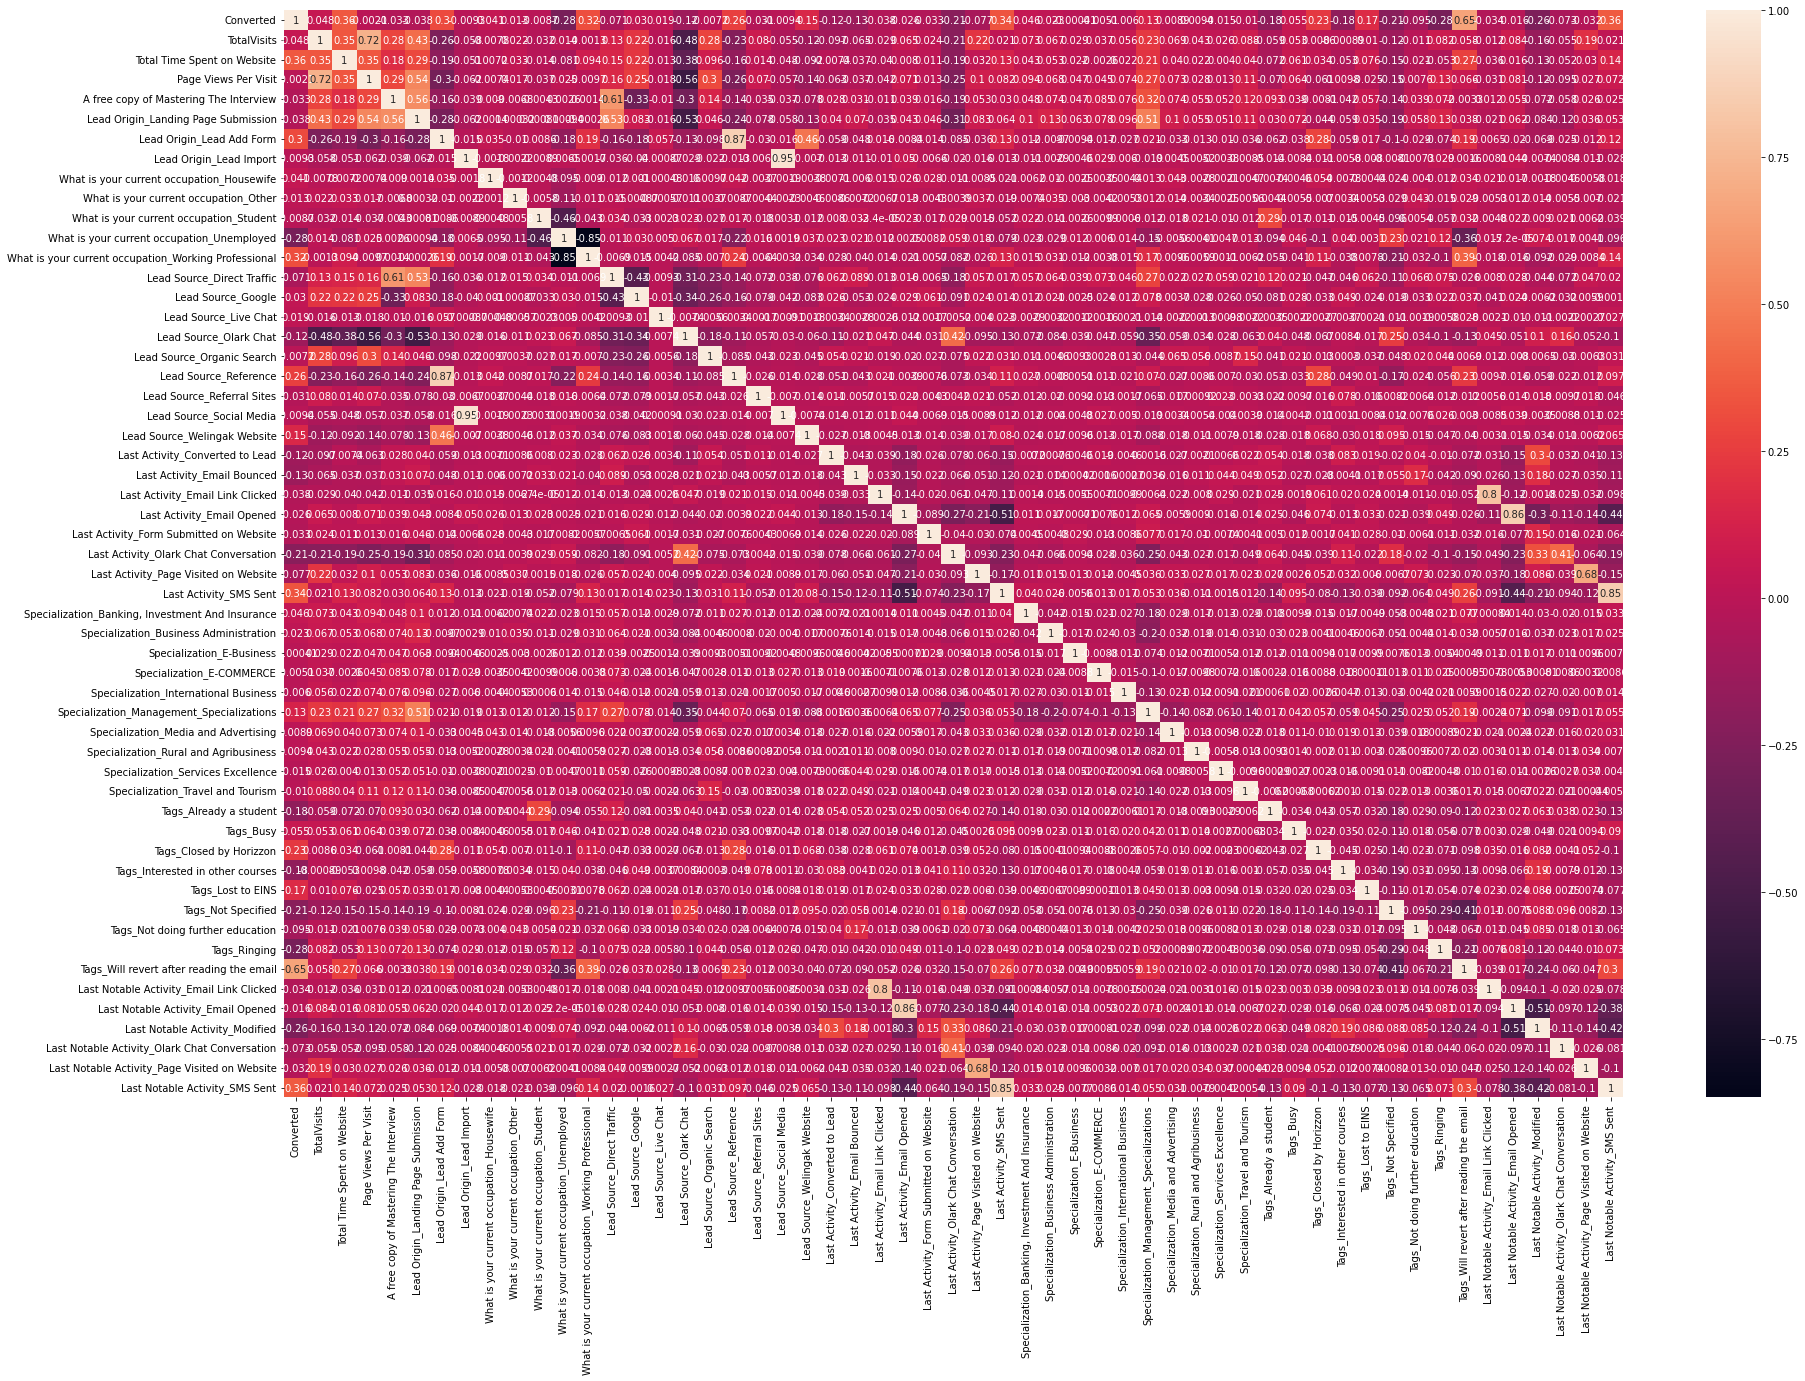

In [94]:
#applying heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Step 6: Model Building

### Feature selection using RFE

In [95]:
logreg = LogisticRegression()

In [96]:
rfe = RFE(logreg, n_features_to_select=15)    # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True,  True, False, False])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('What is your current occupation_Housewife', False, 28),
 ('What is your current occupation_Other', False, 27),
 ('What is your current occupation_Student', False, 18),
 ('What is your current occupation_Unemployed', False, 16),
 ('What is your current occupation_Working Professional', False, 3),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to 

In [99]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [100]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Adm

#### Assessing the model with Statsmodel

In [101]:
# Building model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.2
Date:                Sun, 16 Apr 2023   Deviance:                       2478.4
Time:                        09:00:30   Pearson chi2:                 8.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6061
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8690      0.216    -17.913      0.000      -4.292      -3.446
Total Time Spent on Website                       1.0802      0.061     17.710      0.000       0.961       1.200
Lead Origin_Lead Add Form                         1.7765      0.428      4.152      0.000       0.938       2.615
Lead Source_Olark Chat                            1.2919      0.144      8.941      0.000       1.009       1.575
Lead Source_Welingak Website                      3.5145      0.851      4.129      0.000       1.846       5.183
Last Activity_Email Bounced                      -1.3763      0.546     -2.521      0.012      -2.446      -0.306
Last Activity_SMS Sent                            1.9166      0.116     16.488      0.000       1.689       2.144
Tags_Already a student                           -0.8712      0.634     -1.374      0.169      -2.114       0.371
Tags_Busy                                         3.0472      0.300     10.155      0.000       2.459       3.635
Tags_Closed by Horizzon                           8.8981      0.764     11.644      0.000       7.400      10.396
Tags_Lost to EINS                                 7.8007      0.571     13.662      0.000       6.682       8.920
Tags_Not Specified                                2.2799      0.212     10.764      0.000       1.865       2.695
Tags_Ringing                                     -1.2183      0.308     -3.953      0.000      -1.822      -0.614
Tags_Will revert after reading the email          6.8230      0.274     24.929      0.000       6.287       7.359
Last Notable Activity_Modified                   -1.7178      0.128    -13.432      0.000      -1.968      -1.467
Last Notable Activity_Olark Chat Conversation    -1.8383      0.422     -4.355      0.000      -2.666      -1.011
=================================================================================================================
"""

 - P-value of variable 'Tags_Already a student is high' , so we can drop it

In [102]:
#dropping column with high P-value
col = col.drop('Tags_Already a student', 1)

In [103]:
# Building model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.4
Date:                Sun, 16 Apr 2023   Deviance:                       2480.7
Time:                        09:00:30   Pearson chi2:                 8.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9960      0.204    -19.607      0.000      -4.395      -3.597
Total Time Spent on Website                       1.0758      0.061     17.706      0.000       0.957       1.195
Lead Origin_Lead Add Form                         1.7795      0.430      4.138      0.000       0.937       2.622
Lead Source_Olark Chat                            1.2821      0.144      8.895      0.000       1.000       1.565
Lead Source_Welingak Website                      3.5051      0.852      4.112      0.000       1.834       5.176
Last Activity_Email Bounced                      -1.3756      0.545     -2.522      0.012      -2.444      -0.307
Last Activity_SMS Sent                            1.9362      0.116     16.709      0.000       1.709       2.163
Tags_Busy                                         3.1652      0.293     10.794      0.000       2.590       3.740
Tags_Closed by Horizzon                           9.0214      0.761     11.852      0.000       7.530      10.513
Tags_Lost to EINS                                 7.9261      0.567     13.987      0.000       6.815       9.037
Tags_Not Specified                                2.4027      0.200     11.987      0.000       2.010       2.796
Tags_Ringing                                     -1.1025      0.302     -3.654      0.000      -1.694      -0.511
Tags_Will revert after reading the email          6.9468      0.265     26.216      0.000       6.427       7.466
Last Notable Activity_Modified                   -1.7154      0.128    -13.407      0.000      -1.966      -1.465
Last Notable Activity_Olark Chat Conversation    -1.8326      0.421     -4.348      0.000      -2.659      -1.007
=================================================================================================================
"""

 - All the P-values are less than 5%, so now we can check variance inflation factor to see if there is any correlation betwen the variables

#### Checking VIF

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.77
9,Tags_Not Specified,1.65
11,Tags_Will revert after reading the email,1.65
2,Lead Source_Olark Chat,1.62
5,Last Activity_SMS Sent,1.62
12,Last Notable Activity_Modified,1.48
0,Total Time Spent on Website,1.46
3,Lead Source_Welingak Website,1.32
7,Tags_Closed by Horizzon,1.21
10,Tags_Ringing,1.12


- So all the VIF values are in the order. We won't drop any columns

In [105]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.988481
6138    0.996100
8650    0.985496
3423    0.048727
6552    0.221641
1696    0.450063
2110    0.985097
6830    0.418261
2581    0.006901
5927    0.081915
dtype: float64

In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98848139, 0.99609999, 0.98549639, 0.04872659, 0.22164082,
       0.45006332, 0.98509687, 0.41826135, 0.00690054, 0.08191465])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [107]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.988481,6676
1,1,0.996100,6138
2,1,0.985496,8650
3,0,0.048727,3423
4,0,0.221641,6552


#### Creating new column 'Predicted' with 1 if Converted_prob > 0.5 else 0

In [108]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.988481,6676,1
1,1,0.996100,6138,1
2,1,0.985496,8650,1
3,0,0.048727,3423,0
4,0,0.221641,6552,0


In [109]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3705  166]
 [ 289 2086]]


In [110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9271533781620237


### Metrics beyond Accuracy

In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8783157894736842

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.9571170240247998

In [114]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.04288297597520021


In [115]:
# positive predictive value 
print (TP / float(TP+FP))

0.9262877442273535


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9276414621932899


### Plotting ROC Curve

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

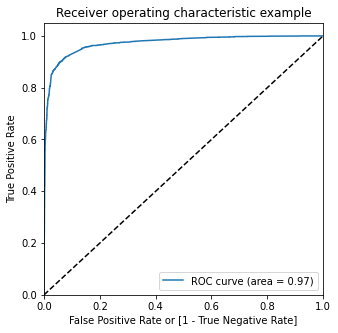

In [119]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


 - ROC value should be close to 1. We are getting around 0.92 indicates a good predictive model

## Step 7: Finding Optimal Cut-off

In [120]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.988481,6676,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996100,6138,1,1,1,1,1,1,1,1,1,1,1
2,1,0.985496,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.048727,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.221641,6552,0,1,1,1,0,0,0,0,0,0,0


In [121]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.837016  0.971368  0.754585
0.2   0.2  0.896734  0.953263  0.862051
0.3   0.3  0.921710  0.914947  0.925859
0.4   0.4  0.925392  0.900211  0.940842
0.5   0.5  0.927153  0.878316  0.957117
0.6   0.6  0.927313  0.859368  0.969000
0.7   0.7  0.912904  0.804211  0.979592
0.8   0.8  0.902177  0.770105  0.983208
0.9   0.9  0.882645  0.708632  0.989408


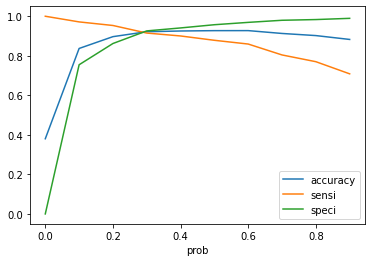

In [122]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve Optimal cut-off is 0.3, intersection of accuracy,sensitivity & specificity

In [123]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.988481,6676,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996100,6138,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.985496,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.048727,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.221641,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [124]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9217098943323727

In [125]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3584,  287],
       [ 202, 2173]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9149473684210526

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.9258589511754068

### Precision and  Recall

In [129]:
from sklearn.metrics import precision_score, recall_score


In [130]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8833333333333333

In [131]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)


0.9149473684210526

#### Precision and Recall tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

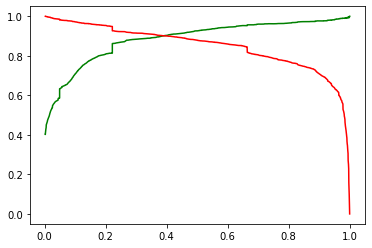

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 8: Model Prediction on the Test set

In [135]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])
                                                                                            

In [136]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7625,2.077703,0,0,0,0,0,0,0,0,0,0,0,0,0
5207,0.739164,0,0,0,0,0,0,0,0,0,0,1,0,0
2390,-0.878390,1,0,0,0,1,0,0,0,0,0,1,0,0
4362,-0.455310,0,0,0,0,1,0,0,0,0,1,0,0,0
1023,-0.300302,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
X_test.shape

(2678, 14)

In [138]:
X_test_sm = sm.add_constant(X_test)

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

7625    0.146686
5207    0.976931
2390    0.996736
4362    0.025281
1023    0.013138
8226    0.989362
3079    0.135684
530     0.014195
7873    0.048727
5146    0.997714
dtype: float64

In [141]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
7625,0.146686
5207,0.976931
2390,0.996736
4362,0.025281
1023,0.013138


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [143]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7625,0.146686
1,1,5207,0.976931
2,1,2390,0.996736
3,0,4362,0.025281
4,0,1023,0.013138


In [145]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7625,0.146686
1,1,5207,0.976931
2,1,2390,0.996736
3,0,4362,0.025281
4,0,1023,0.013138


In [146]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,7625,0,0.146686
1,5207,1,0.976931
2,2390,1,0.996736
3,4362,0,0.025281
4,1023,0,0.013138


In [147]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_Predicted
0,7625,0,0.146686,0
1,5207,1,0.976931,1
2,2390,1,0.996736,1
3,4362,0,0.025281,0
4,1023,0,0.013138,0


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9230769230769231

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1559,  125],
       [  81,  913]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


0.9185110663983903

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.9257719714964371

In [153]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)


0.8795761078998073

In [154]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9185110663983903

### Final Conclusion:

Comparison of values obtained for Train and Test

#### Train Data :

- Accuracy : 92.17%
- Sensitivity : 91.49%    
- Specificity : 92.58%    

#### Test Data :

- Accuracy : 92.30%
- Sensitivity : 91.85%    
- Specificity : 92.57%    

#### The Model seems to be predicted very well by looking at the score mentioned above